# Patrones temporales en la cantidad de manchas solares

La superficie del Sol no es uniforme y ciertas regiones oscuras aparecen en posiciones aleatorias a lo largo del tiempo. Rudolf Wolfer propuso en 1848 una regla que combinaba el número y el tamaño de estas manchas solares en un único índice. Usando archivos históricos, los astrónomos aplicaron la regla de Wolfer para determinar la actividad de las manchas solares desde el año 1700.

Puede explorar la información disponible [Aquí](https://www.sidc.be/silso/). Encotrará datos cuantificados de las manchas solares en archivos ASCII.

Desde el enlace yearly sunspot number se ha descargado el fichero yearssn.dat que contiene los datos del número de manchas solares desde el año 1700 hasta el año 2012. Alternativamente, se puede descargar en este enlace yearssn.dat. Una porción del largo fichero es el siguiente:

In [1]:
import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

import scipy as sci
import scipy.signal as sig
from scipy.fftpack import fft,ifft

In [2]:
print(sci.__version__)

1.9.3


In [44]:
URL = 'https://www.sidc.be/silso/INFO/snytotcsv.php'
datos = pd.read_csv(URL,
                    header = None,sep = ";")
datos.columns=['Fecha',
               'NumManchas',
               'DesvEst',
               'NumObs',
               'Def/Prov']
datos

,Fecha,NumManchas,DesvEst,NumObs,Def/Prov
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1
2,1702.5,26.7,-1.0,-1,1
3,1703.5,38.3,-1.0,-1,1
4,1704.5,60.0,-1.0,-1,1
...,...,...,...,...,...
318,2018.5,7.0,1.1,12611,1
319,2019.5,3.6,0.5,12884,1
320,2020.5,8.8,4.1,14440,1
321,2021.5,29.6,7.9,15233,1


Se grafica la cantidad de manchas para cada año.

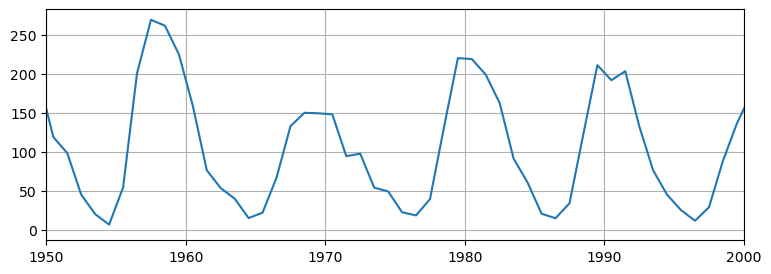

In [55]:
x = list(datos["NumManchas"])
t = list(datos["Fecha"])
plt.rcParams['figure.figsize'] = 9, 3
plt.plot(t,x)
plt.xlim([1950,2000])
plt.grid()

Se desea identificar si hay algún patrón en este comportamiento.


- Como hay datos cada año, se considera que el periodo de muestreo es $T_s = 1 año$, es decir, la frecuencia de muestreo es $f_s = 1 muestra/año$

In [47]:
nel = len(x) # número de muestras en x
fs = 1 # frecuencia de muestreo
f = np.linspace(0,fs*(1-(1/nel)),nel)#Vector de frecuencias

X_fft = fft(x) # calculate fourier transform (complex numbers list)


Se obtiene el espectro de la señal a través de la Transformada Rápida de Fourier. Preste atención a las frecuencias.

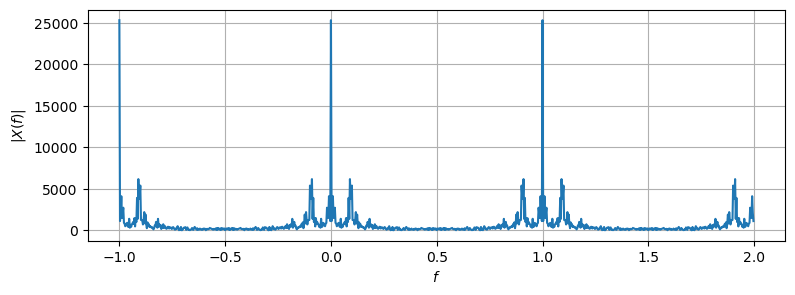

In [48]:
plt.figure(figsize=(9,3))
plt.plot(np.append(np.append(-fs+f,f),
                   f+fs),
         np.append(np.append(abs(X_fft),abs(X_fft)),
                             abs(X_fft)))
plt.xlabel(r'$f$')
plt.ylabel(r'$|X(f)|$')
plt.grid()

La gráfica anterior muestra tres periodos del espectro. Como los espectros de las señales discretas son periódicos, se analizará solamente para las frecuencias entre $0$ y $0.5$

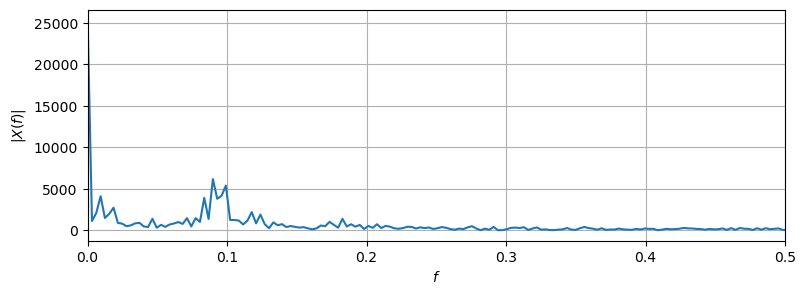

In [49]:
plt.plot(np.append(np.append(-fs+f,f),
                   f+fs),
         np.append(np.append(abs(X_fft),abs(X_fft)),
                             abs(X_fft)))
plt.xlim([0,0.5])
plt.xlabel(r'$f$')
plt.ylabel(r'$|X(f)|$')
plt.grid()

En ocasiones es interesante analizar a través de la [densidad espectral](https://es.wikipedia.org/wiki/Densidad_espectral) $P$.

$$P(j\omega) = |\mathcal{F(x(t)}|^2$$

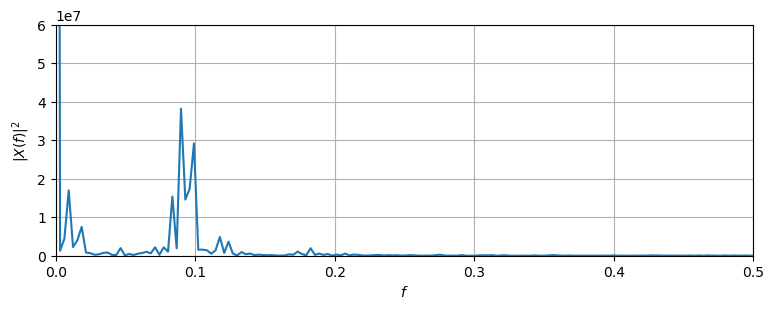

In [65]:
PX = abs(X_fft)**2

plt.plot(np.append(np.append(-fs+f,f),
                   f+fs),
         np.append(np.append(PX,PX),PX))
plt.xlim([0.,0.5])
plt.ylim([0,0.6*10**8])
plt.xlabel(r'$f$')
plt.ylabel(r'$|X(f)|^2$')
plt.grid()

Según el espectro, hay un comportamiento periódico de frecuencia $f=0.__$, es decir que se repite cada

In [53]:
f0 = 0.09
T = 1/f0
T

Se espera que cada T años haya un máximo de manchas solares.

----------------


Existe una tendencia más lenta en este fenómeno?

In [56]:
P = np.polyfit(t,x,1)
P

array([  0.07049814, -52.85272249])

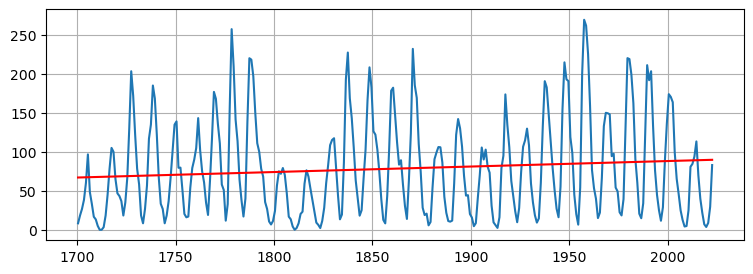

In [57]:
P = np.polyfit(t,x,1)
x_trend = np.array(t)*P[0]+P[1]
plt.rcParams['figure.figsize'] = 9, 3
plt.plot(t,x)
plt.plot(t,x_trend,'r')
plt.grid()
#plt.xlim([1700,1800])


Realice el análisis del fenómeno quitando la tendencia de crecimiento lineal.

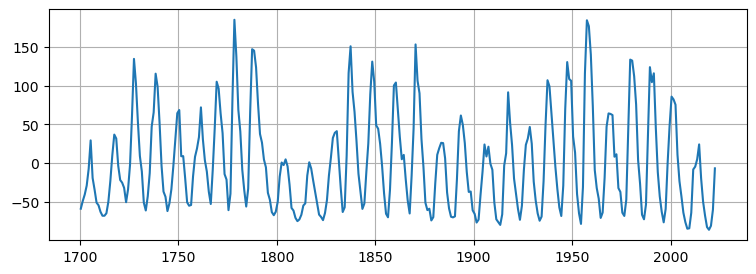

In [58]:
x_limpia = x - x_trend
plt.rcParams['figure.figsize'] = 9, 3
plt.plot(t,x_limpia)
plt.grid()

In [59]:
X_limpia_fft = fft(x_limpia) # calculate fourier transform (complex numbers list)

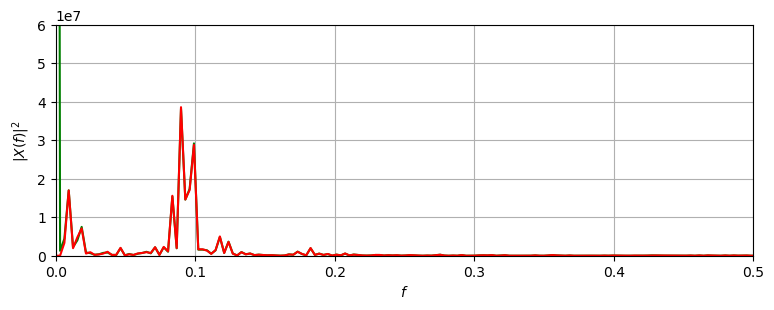

In [60]:
PX_limpia = abs(X_limpia_fft)**2

plt.plot(np.append(np.append(-fs+f,f),
                   f+fs),
         np.append(np.append(PX,PX),PX),'g')

plt.plot(np.append(np.append(-fs+f,f),
                   f+fs),
         np.append(np.append(PX_limpia,PX_limpia),PX_limpia),'r')
plt.xlim([0.,.5])
plt.ylim([0,0.6*10**8])
plt.xlabel(r'$f$')
plt.ylabel(r'$|X(f)|^2$')
plt.grid()

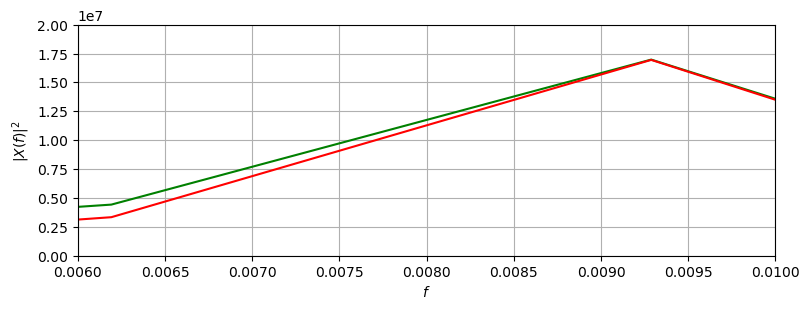

In [69]:
PX_limpia = abs(X_limpia_fft)**2

plt.plot(np.append(np.append(-fs+f,f),
                   f+fs),
         np.append(np.append(PX,PX),PX),'g')

plt.plot(np.append(np.append(-fs+f,f),
                   f+fs),
         np.append(np.append(PX_limpia,PX_limpia),PX_limpia),'r')
plt.xlim([0.006,.01])
plt.ylim([0,0.2*10**8])
plt.xlabel(r'$f$')
plt.ylabel(r'$|X(f)|^2$')
plt.grid()

In [70]:
f1 = 0.00925
T1 = 1/f1
T1